## Challenge

The challenge for this video is to use scikit-learn to create a line of best fit for the included 'challenge_dataset'. Then, make a prediction for an existing data point and see how close it matches up to the actual value. Print out the error you get.

Bonus points if you perform linear regression on a dataset with 3 different variables

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np

In [6]:
#regression with two variables

data = pd.read_csv("D:\\pkworkspace\\100DaysDataScience\\datasets\\sirjaRavalChallange\\challenge_dataset.txt", names=['X','Y'])

In [7]:
data.head()

,X,Y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [14]:
data.shape

(97, 2)

In [15]:
x = data['X']
y = data['Y']

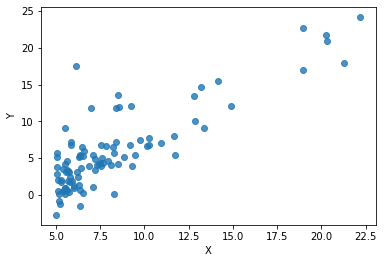

In [17]:
sns.regplot(x, y, data = data, fit_reg= False)
plt.show()

#### 2D Regression

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1, test_size= 0.2)

In [49]:
x_train.shape

(77,)

In [50]:
x_test.shape

(20,)

In [51]:
x_train= x_train.values.reshape(-1,1)
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)
x_test= x_test.values.reshape(-1,1)

In [52]:
x_train.shape

(77, 1)

In [53]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
print("Score: ", reg.score(x_test,y_test))

Score:  0.357987467697354


#### Plot result

In [55]:
x_line = np.arange(5,25).reshape(-1,1)

In [56]:
x_line

array([[ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24]])

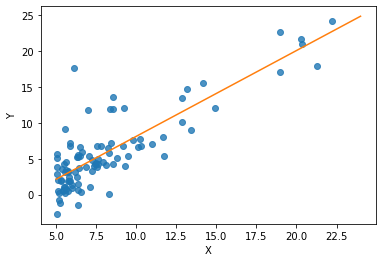

In [58]:
sns.regplot(x,y, data=data, fit_reg=False)
plt.plot(x_line, reg.predict(x_line))
plt.show()

# 3D Variables

#### Data Preprocessing

In [68]:
#import
co2_df= pd.read_csv("D:\\pkworkspace\\100DaysDataScience\\datasets\\sirjaRavalChallange\\global_co2.csv")
temp_df = pd.read_csv("D:\\pkworkspace\\100DaysDataScience\\datasets\\sirjaRavalChallange\\annual_temp.csv")


In [69]:
co2_df.head()

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN


In [70]:
temp_df.head()

,Source,Year,Mean
0,GCAG,2015,0.8990
1,GISTEMP,2015,0.8700
2,GCAG,2014,0.7402
3,GISTEMP,2014,0.7500
4,GCAG,2013,0.6687


In [82]:
# Clean data
co2_df = co2_df.iloc[:,:2]                     # Keep only total CO2
co2_df = co2_df.loc[co2_df['Year'] >= 1960]   # Keep only 1960 - 2010
co2_df.columns=['Year','CO2']                # Rename columns
co2_df = co2_df.reset_index(drop=True)                # Reset index

# temp_df = temp_df[temp_df.Source != 'GISTEMP']                              # Keep only one source
# temp_df.drop('Source', inplace=True, axis=1)                                # Drop name of source
temp_df = temp_df.reindex(index=temp_df.index[::-1])                        # Reset index
temp_df = temp_df.loc[temp_df['Year'] >= 1960].loc[temp_df['Year'] <= 2010]   # Keep only 1960 - 2010
temp_df.columns=['Year','Temperature']                                      # Rename columns
temp_df = temp_df.reset_index(drop=True)                                             # Reset index

print(co2_df.head())
print(temp_df.head())

   Year   CO2
0  1960  2569
1  1961  2580
2  1962  2686
3  1963  2833
4  1964  2995
   Year  Temperature
0  2010       0.7008
1  2009       0.6354
2  2008       0.5415
3  2007       0.6113
4  2006       0.6139


In [83]:
#Concatenate
climate_change_df= pd.concat([co2_df, temp_df.Temperature], axis=1)

In [84]:
climate_change_df.head()

,Year,CO2,Temperature
0,1960,2569,0.7008
1,1961,2580,0.6354
2,1962,2686,0.5415
3,1963,2833,0.6113
4,1964,2995,0.6139


#### Visualize data

In [85]:
from mpl_toolkits.mplot3d import Axes3D

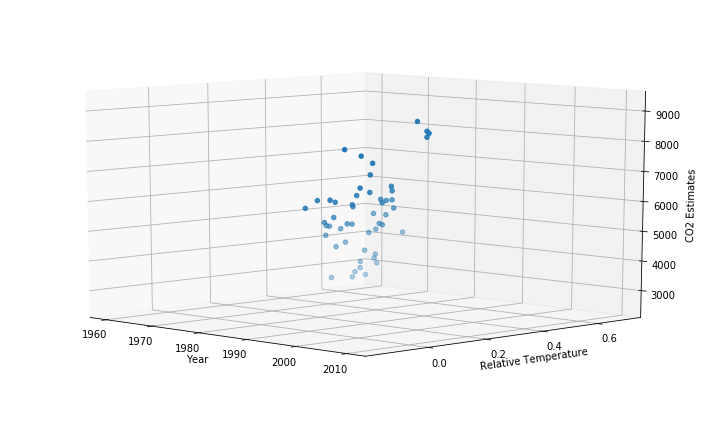

In [87]:
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax =fig.add_subplot(111, projection='3d')
ax.scatter(xs=climate_change_df['Year'], ys = climate_change_df['Temperature'],
          zs=climate_change_df['CO2'])
ax.set_ylabel('Relative Temperature')
ax.set_xlabel('Year')
ax.set_zlabel('CO2 Estimates')
ax.view_init(10, -45)

project 2d plot


Text(0, 0.5, 'Relative Temperature')

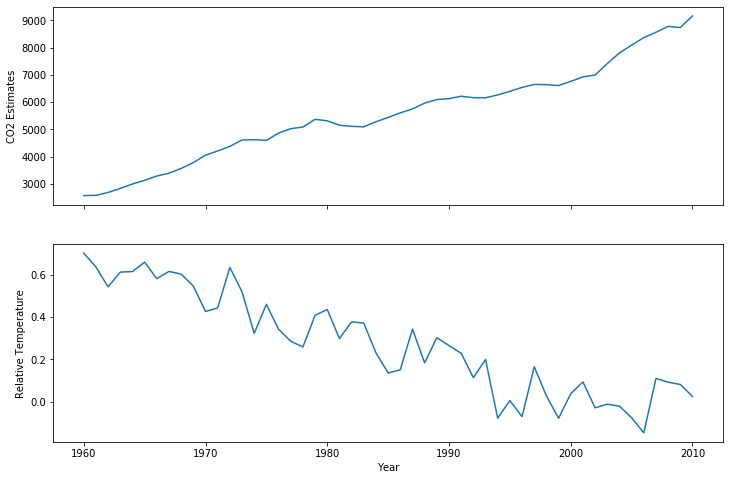

In [88]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12, 8)
axarr[0].plot(climate_change_df['Year'], climate_change_df['CO2'])
axarr[0].set_ylabel('CO2 Estimates')
axarr[1].plot(climate_change_df['Year'], climate_change_df['Temperature'])
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative Temperature')

### Linear Regression

In [95]:
x = climate_change_df[['Year']]
y = climate_change_df[['CO2', 'Temperature']].astype('float32')


In [96]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)

In [97]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
#score
print('Score: ', reg.score(x_test, y_test)*100)

Score:  98.23238030326544


C:\Users\acer\anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [101]:
# plot regression
x_line = np.arange(1960,2011).reshape(-1,1)
p = reg.predict(x_line).T


Text(0, 0.5, 'Relative temperature')

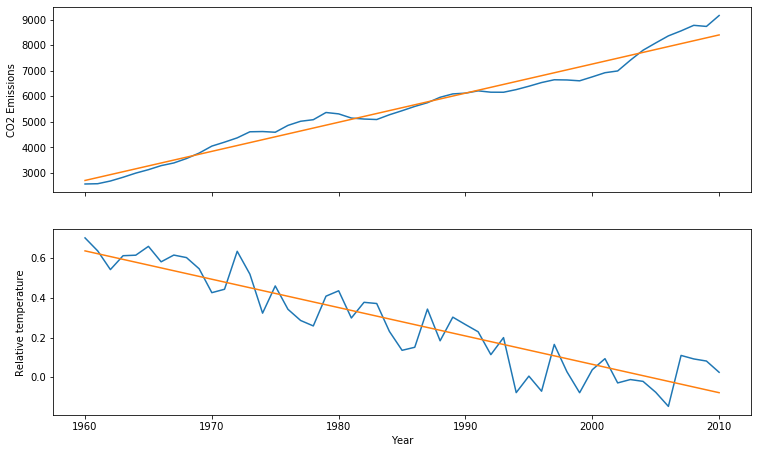

In [102]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5, 7.5)
axarr[0].plot(climate_change_df['Year'], climate_change_df['CO2'])
axarr[0].plot(x_line, p[0])
axarr[0].set_ylabel('CO2 Emissions')
axarr[1].plot(climate_change_df['Year'], climate_change_df['Temperature'])
axarr[1].plot(x_line, p[1])
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative temperature')